# Discrete Fourier Transform

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
T = 10
T_points = 10000

t = np.linspace(0, T, T_points).reshape(1,-1)
t.shape

(1, 10000)

In [3]:
print(f'Sampling frequency used for plotting = {T_points/T} Hz')

Sampling frequency used for plotting = 1000.0 Hz


## Define Spectrum Plotting Function

Numpy FFT function is used

In [4]:
def plot_spectrum(x_t, REMOVE = 1, fs = T_points/T, mode='c'):
    N = len(x_t.T)
    x_f =np.fft.fftshift(np.abs(np.fft.fft(x_t))).reshape(-1)[REMOVE:-REMOVE]
    f = np.fft.fftshift(np.fft.fftfreq(N)*fs)[REMOVE:-REMOVE]
    plt.xlabel("Frequency / Hz")
    plt.ylabel("Amplitude")
    plt.title("Frequency Spectrum")
    if mode=='d':
        plt.scatter(f,x_f)
    else:
        plt.plot(f,x_f)
    return f, x_f
    

In [5]:
# Sampling frequency
fs = 20

pulse_train = 0*t
n = T_points//(T*fs)
pulse_train[:,::n] = 1

## Multi-Tone Signal

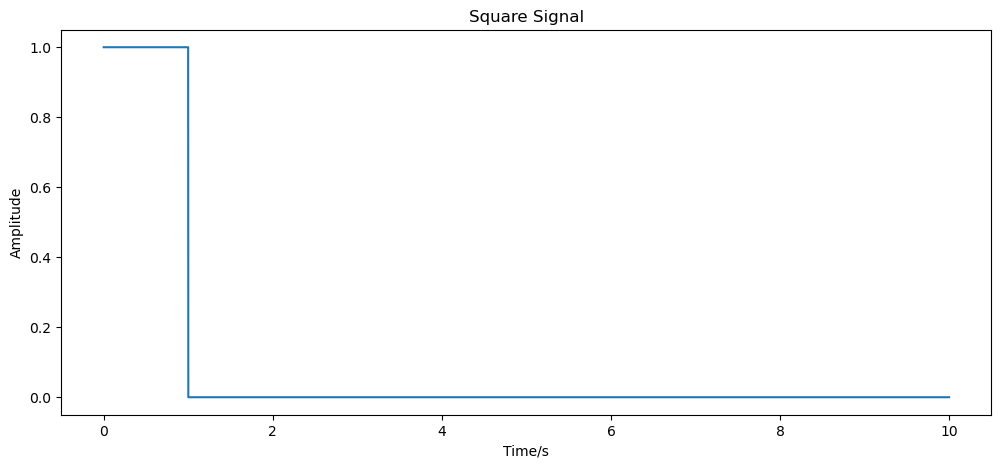

In [6]:
x_mul = 0*t
x_mul[:,0:T_points//10] = 1

plt.figure(figsize=(12,5))
plt.title("Square Signal")
plt.plot(t.T, x_mul.T)
plt.xlabel("Time/s")
plt.ylabel("Amplitude")
plt.show()

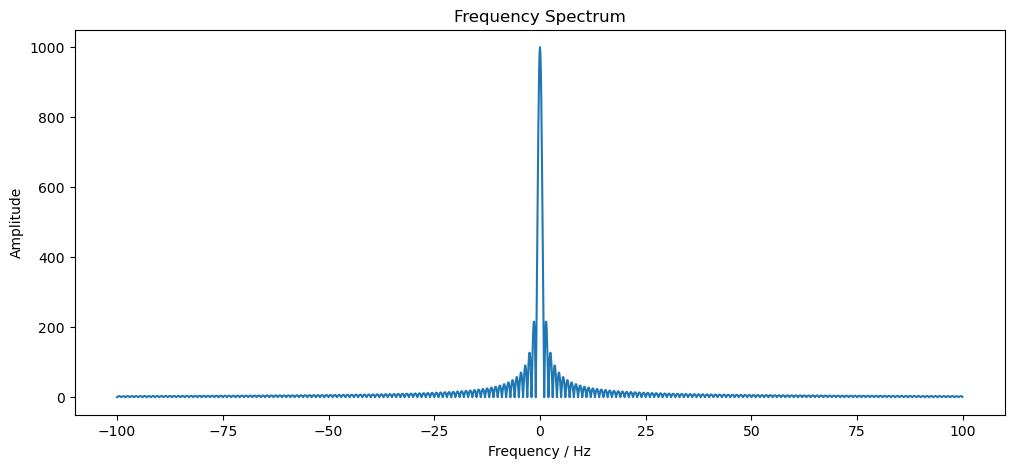

In [7]:
plt.figure(figsize=(12,5))
plot_spectrum(x_mul, REMOVE=4000)
pass

## "Discrete" Domain

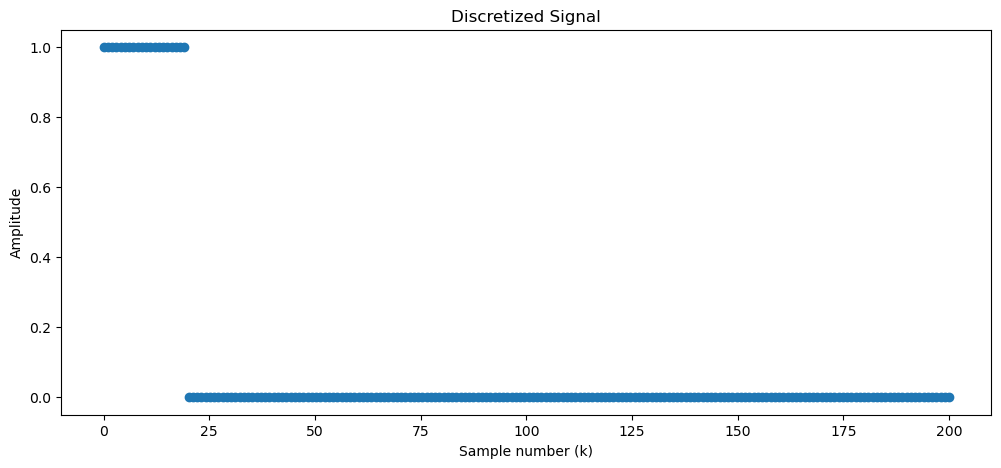

Length of signal 200 samples


In [8]:
x_k = x_mul[pulse_train==1]
k = np.linspace(0,len(x_k), len(x_k))

plt.figure(figsize=(12,5))
plt.title("Discretized Signal")
plt.scatter(k, x_k)
plt.xlabel("Sample number (k)")
plt.ylabel("Amplitude")
plt.show()

print(f'Length of signal {len(k)} samples')

Original Spectrum


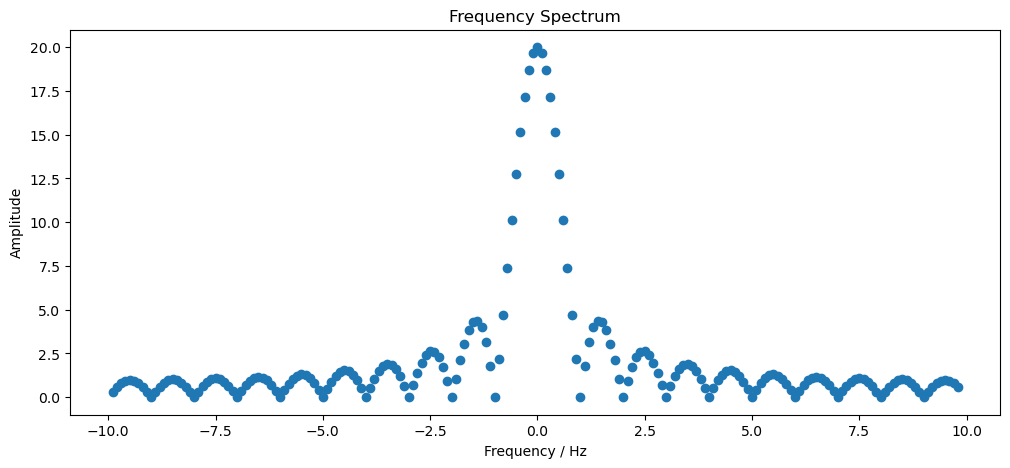

In [9]:
plt.figure(figsize=(12,5))
f,x_f = plot_spectrum(x_k, fs=fs, mode='d')
print("Original Spectrum")

### Windowing the Signal

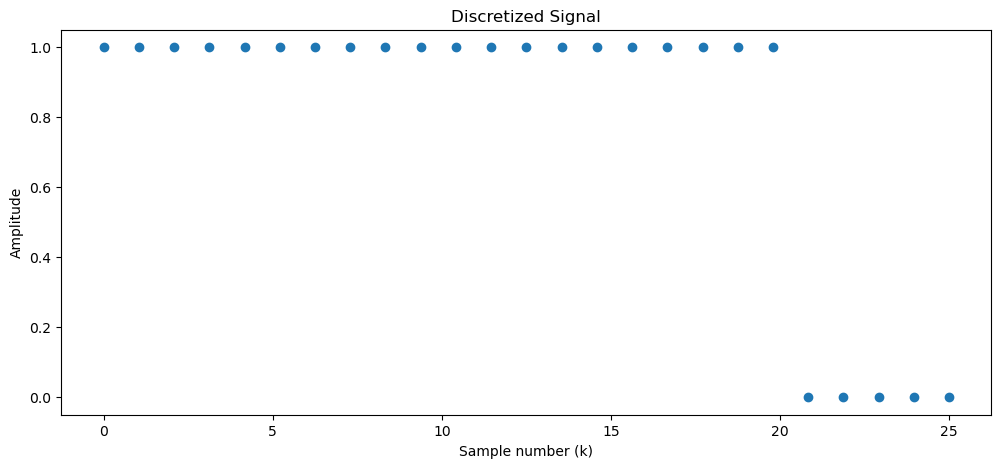

Length of signal 25 samples


In [10]:
# Length of Window
WINDOW = 25

x_k_w = x_k[0:WINDOW]
k_w = np.linspace(0,len(x_k_w), len(x_k_w))

plt.figure(figsize=(12,5))
plt.title("Discretized Signal")
plt.scatter(k_w, x_k_w)
plt.xlabel("Sample number (k)")
plt.ylabel("Amplitude")
plt.show()

print(f'Length of signal {len(k_w)} samples')

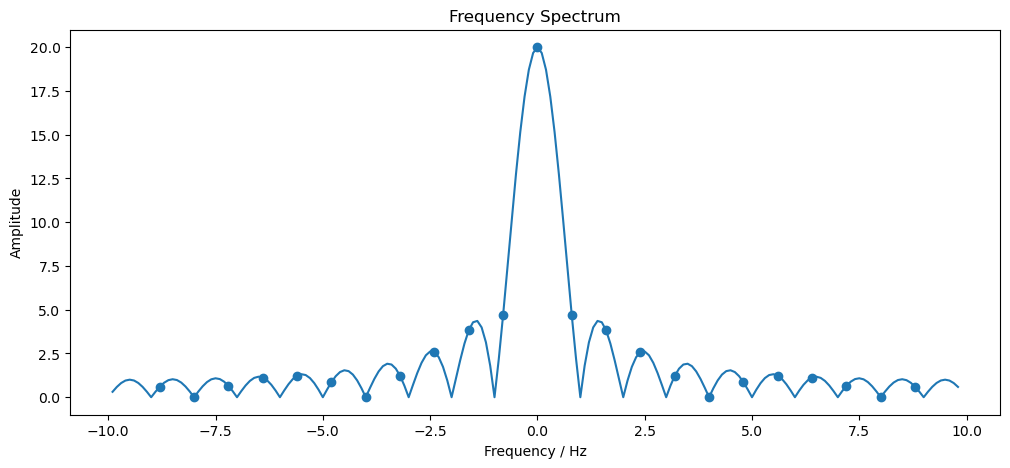

In [11]:
plt.figure(figsize=(12,5))
_,_ = plot_spectrum(x_k, fs=fs)
_,_ = plot_spectrum(x_k_w, fs=fs, mode='d')

## Monotone Signal

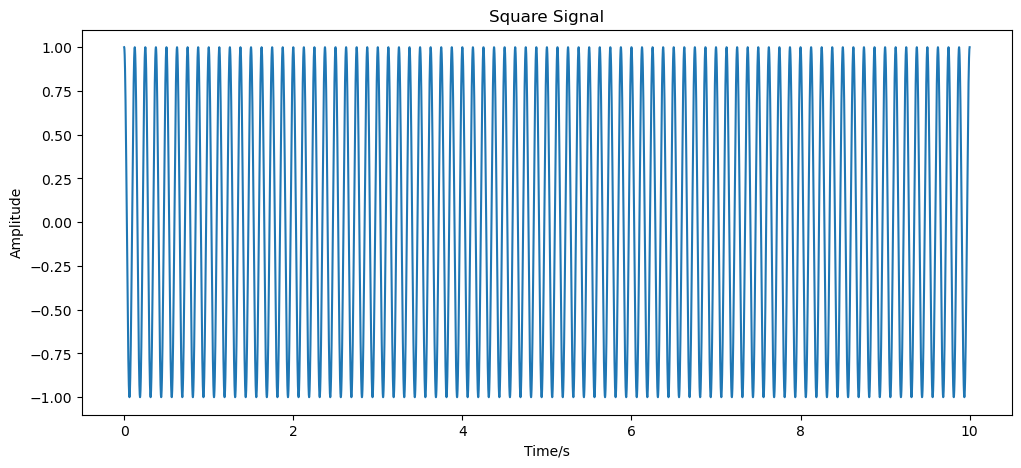

In [12]:
freq = 8
phase = 0

x_t = np.cos(2*np.pi*freq*t+phase)

plt.figure(figsize=(12,5))
plt.title("Square Signal")
plt.plot(t.T, x_t.T)
plt.xlabel("Time/s")
plt.ylabel("Amplitude")
plt.show()

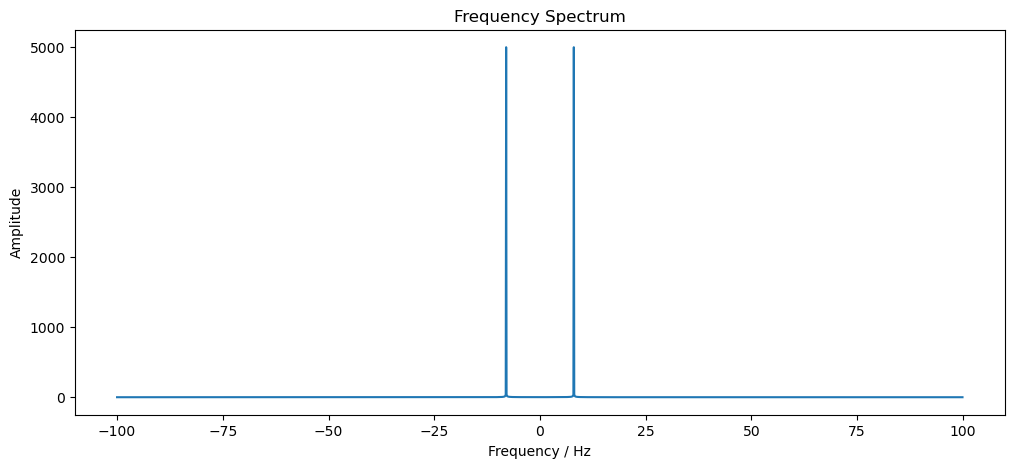

In [13]:
plt.figure(figsize=(12,5))
plot_spectrum(x_t, REMOVE=4000)
pass

In [14]:
# Sampling frequency
fs = 20

pulse_train = 0*t
n = T_points//(T*fs)
pulse_train[:,::n] = 1

## "Discrete" Domain

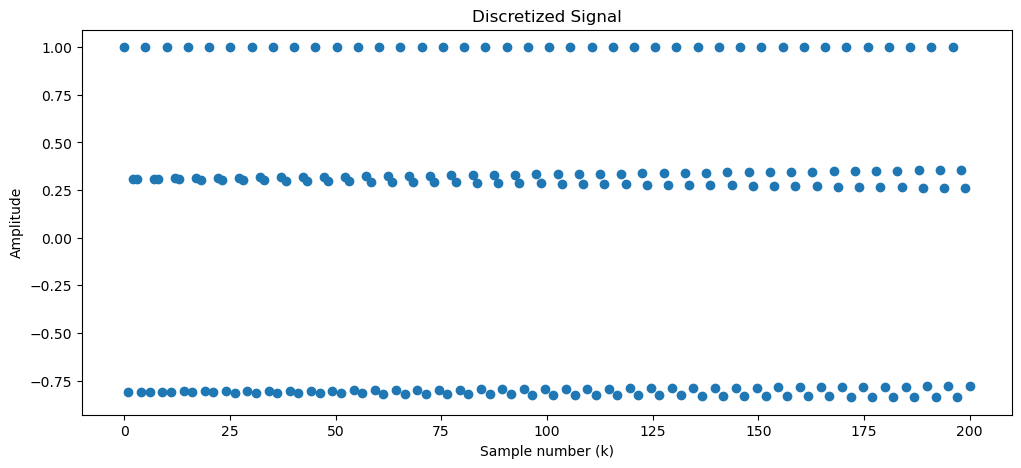

Length of signal 200 samples


In [15]:
x_k = x_t[pulse_train==1]
k = np.linspace(0,len(x_k), len(x_k))

plt.figure(figsize=(12,5))
plt.title("Discretized Signal")
plt.scatter(k, x_k)
plt.xlabel("Sample number (k)")
plt.ylabel("Amplitude")
plt.show()

print(f'Length of signal {len(k)} samples')

### Discrete Time Fourier Transform (DTFT)

Original Spectrum


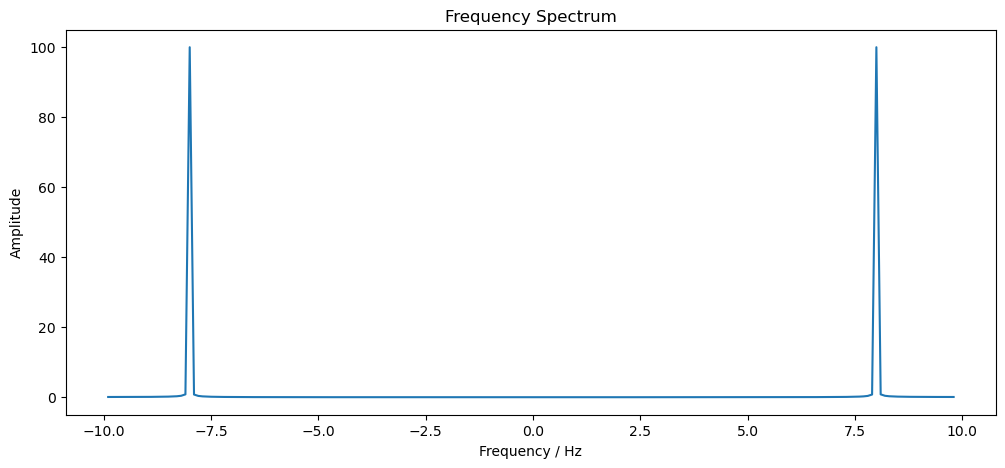

In [16]:
plt.figure(figsize=(12,5))
f,x_f = plot_spectrum(x_k, fs=fs)
print("Original Spectrum")

### Windowing the Signal

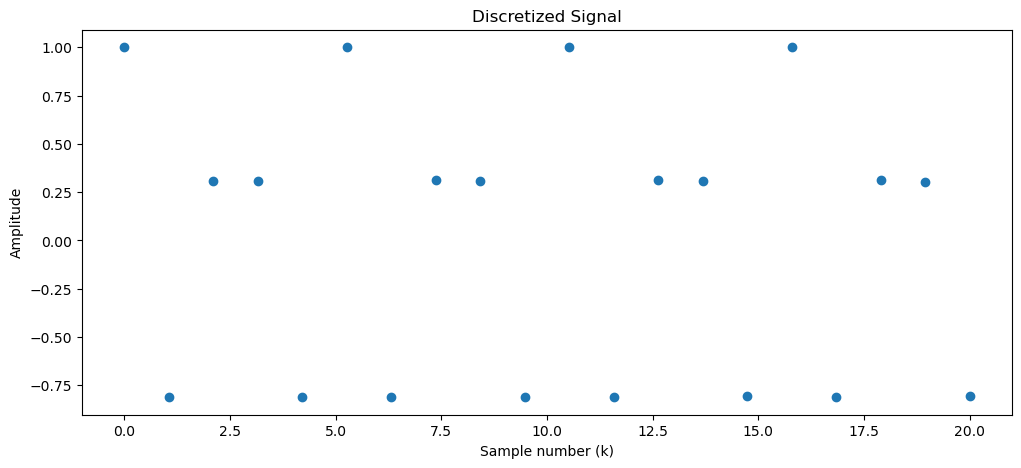

Length of signal 20 samples
Time Period of window = 1


In [17]:
# Length of Window
WINDOW = 20

wind = (0*k).reshape(-1)
wind[0:WINDOW] = 1

x_k_w = x_k[0:WINDOW]
k_w = np.linspace(0,len(x_k_w), len(x_k_w))

plt.figure(figsize=(12,5))
plt.title("Discretized Signal")
plt.scatter(k_w, x_k_w)
plt.xlabel("Sample number (k)")
plt.ylabel("Amplitude")
plt.show()

print(f'Length of signal {len(k_w)} samples')
print(f'Time Period of window = {len(k_w)//fs}')

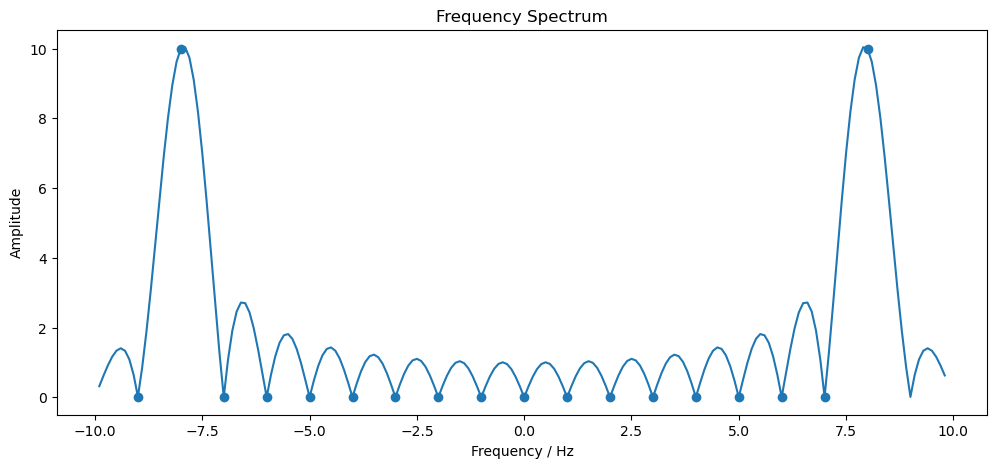

In [18]:
plt.figure(figsize=(12,5))
_,_ = plot_spectrum(x_k*wind, fs=fs)
_,_ = plot_spectrum(x_k_w, fs=fs, mode='d')